In [1]:
# question: how often does the US mention their war participants in their speeches each year

Did the US become more or less 'whiny' over the years in their UN speeches?

Object `speeches` not found.


In [2]:
import os
import numpy as np
import pandas as pd
import re

import nltk
from nltk.probability import FreqDist
from nltk import word_tokenize
from nltk.corpus import stopwords

import matplotlib.pyplot as plt


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /Users/stathis/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/stathis/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/stathis/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
sessions = np.arange(25, 76)
data=[]

for session in sessions:
    directory = "TXT/Session "+str(session)+" - "+str(1945+session)
    # directory = f"./TXT/Session {session} - {1945+session}"
    for filename in os.listdir(directory):
        # f = open(os.path.join(directory, filename))
        with open(os.path.join(directory, filename)) as f:
            if filename[0]==".": #ignore hidden files
                continue
            splt = filename.split("_")
            data.append([session, 1945+session, splt[0], f.read()])

df_speech = pd.DataFrame(data, columns=['Session','Year','ISO-alpha3 Code','Speech'])

UNSD = pd.read_csv('UNSD — Methodology.csv',sep=';')


un_df = pd.merge(df_speech, UNSD, on='ISO-alpha3 Code', how='inner')


un_df = un_df[un_df['ISO-alpha3 Code'] == 'USA']



un_df = un_df[[ 'Year', "Speech"]]
un_df.set_index('Year', inplace=True)
un_df.info



<bound method DataFrame.info of                                                  Speech
Year                                                   
1970  1.\t It is my privilege to extend to you once ...
1971   Mr. President, I should like first of all to ...
1972  During the past few years the world has made r...
1973  ﻿35.\tI should like to add my congratulations ...
1974  Last year, at the previous session [.2124th me...
1975  At the outset, let me say how pleased we are t...
1976  Let me first congratulate this body for electi...
1977  ﻿1.\t Mr. President, I wish to offer you my co...
1978  ﻿103.\tMr. President, I congratulate you on yo...
1979  ﻿We meet in this General Assembly on the thres...
1980  ﻿Mr. President, I congratulate you on your ele...
1981  The United Nations, this parliament of man, of...
1982  I begin by paying a tribute to the new \nSecre...
1983  ﻿1.\tThank you for granting me the honor of sp...
1984  ﻿First of all, I wish to congratulate you, Mr....
1985  Let me sta

Conflict Participants csv has been edited to include the correct end dates, provided via a chat gpt prompt and cleaned in excel.

Need a loop to cycle through Conflict Participants csv, and create a new data frame with only rows with united states being mentioned, first read in conflict participants

In [4]:
participant_df = pd.read_csv('Conflicts participants.csv',sep=',')
participant_df

,Conflict,Start Year,End Year,Participant 1,Participant 2,Participant 3,Participant 4,Participant 5,Participant 6,Participant 7,...,Participant 11,Participant 12,Participant 13,Participant 14,Participant 15,Participant 16,Participant 17,Participant 18,Participant 19,Participant 20
0,Vietnam War,1955,1975,People's Republic of China,Colombia,New Zealand,Thailand,Kingdom of Laos,United States of America,North Korea,...,South Korea,Republic of Vietnam,Australia,Kingdom of Cambodia,NaN,NaN,NaN,NaN,NaN,NaN
1,Sino-Vietnamese War,1979,1979,People's Republic of China,Vietnam,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Cambodian–Vietnamese War,1978,1989,Vietnam,Democratic Kampuchea,Thailand,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Angolan Civil War,1975,2002,Cuba,South Africa,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,War in Donbas,2014,2022,Ukraine,Russia,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,Second Cambodia Civil,1957,1958,Cambodia,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,Second Rwanda War,2022,2022,Rwanda,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,Second Liberia War,1986,1987,Liberia,Nigeria,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,1991–1992 South Ossetia War,1947,1947,Republic of North Ossetia-Alania,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The apply() function in Pandas applies a function along an axis of the DataFrame. You can use it to apply a custom function that checks if a specific string is present in a row of the DataFrame. Here is the code: The function we are applying along each row is checking for the USA string.

In [5]:
def find_string(row, string):
    return any([string in str(cell) for cell in row])

string = 'United States of America'

mask = participant_df.apply(lambda row: find_string(row, string), axis=1)

result = participant_df[mask]
result

,Conflict,Start Year,End Year,Participant 1,Participant 2,Participant 3,Participant 4,Participant 5,Participant 6,Participant 7,...,Participant 11,Participant 12,Participant 13,Participant 14,Participant 15,Participant 16,Participant 17,Participant 18,Participant 19,Participant 20
0,Vietnam War,1955,1975,People's Republic of China,Colombia,New Zealand,Thailand,Kingdom of Laos,United States of America,North Korea,...,South Korea,Republic of Vietnam,Australia,Kingdom of Cambodia,NaN,NaN,NaN,NaN,NaN,NaN
6,Kosovo War,1998,1999,Italy,Germany,Turkey,United Kingdom,Hungary,Czech Republic,Iceland,...,Federal Republic of Yugoslavia,Poland,Belgium,Portugal,France,Canada,Norway,United States of America,Denmark,Netherlands
9,War in Afghanistan,2001,2022,Georgia,United Kingdom,Czech Republic,Germany,Australia,Turkey,Italy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,Korean War,1950,1953,Colombia,Greece,People's Republic of China,Soviet Union,Turkey,United Kingdom,New Zealand,...,Philippines,South Korea,Australia,Belgium,Thailand,South Africa,France,Canada,United States of America,Netherlands
16,Indochina Wars,1946,1954,Vietnam,People's Republic of China,Laos,Democratic Kampuchea,New Zealand,Philippines,Khmer Republic,...,Australia,Thailand,Kingdom of Laos,United States of America,North Korea,State of Vietnam,Kingdom of Cambodia,NaN,NaN,NaN
20,War on Terror,2001,2022,Russia,People's Republic of China,United Kingdom,France,United States of America,Islamic State,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,Insurgency in Khyber Pakhtunkhwa,1987,2022,United Kingdom,United States of America,Pakistan,Islamic State,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,2003 invasion of Iraq,1964,1967,United Kingdom,Poland,Australia,United States of America,Ba'athist Iraq,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,Gulf War,1979,1986,United Kingdom,Saudi Arabia,France,United States of America,Ba'athist Iraq,Kuwait,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,Yom Kippur War,1998,1998,Syria,Egypt,Israel,United States of America,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Grab all the unique string values from columns 4-24 and remove duplicates, this represents all war partners(enemies+allies) over the data range. It will make up the columns of our next data set

In [6]:
df2 = pd.unique(result[['Participant 1', 'Participant 2', 'Participant 3', 'Participant 4', 'Participant 5', 'Participant 6', 'Participant 7', 'Participant 8', 'Participant 9', 'Participant 10', 'Participant 11', 'Participant 12', 'Participant 13', 'Participant 14', 'Participant 15', 'Participant 16', 'Participant 17', 'Participant 18', 'Participant 19', 'Participant 20']].values.ravel())
print(df2)

["People's Republic of China" 'Colombia' 'New Zealand' 'Thailand'
 'Kingdom of Laos' 'United States of America' 'North Korea' 'Philippines'
 'Khmer Republic' 'North Vietnam' 'South Korea' 'Republic of Vietnam'
 'Australia' 'Kingdom of Cambodia' nan 'Italy' 'Germany' 'Turkey'
 'United Kingdom' 'Hungary' 'Czech Republic' 'Iceland' 'Albania'
 'Luxembourg' 'Spain' 'Federal Republic of Yugoslavia' 'Poland' 'Belgium'
 'Portugal' 'France' 'Canada' 'Norway' 'Denmark' 'Netherlands' 'Georgia'
 'Romania' 'Greece' 'Soviet Union' 'Ethiopia' 'South Africa' 'Vietnam'
 'Laos' 'Democratic Kampuchea' 'State of Vietnam' 'Russia' 'Islamic State'
 'Pakistan' "Ba'athist Iraq" 'Saudi Arabia' 'Kuwait' 'Syria' 'Egypt'
 'Israel' 'Guatemala']


we can remove 'Unites States of America' and nan values from this list.

In [7]:
strings_to_remove = ["United States of America"]

new_list = [item for item in df2 if item not in strings_to_remove]

print(new_list)

["People's Republic of China", 'Colombia', 'New Zealand', 'Thailand', 'Kingdom of Laos', 'North Korea', 'Philippines', 'Khmer Republic', 'North Vietnam', 'South Korea', 'Republic of Vietnam', 'Australia', 'Kingdom of Cambodia', nan, 'Italy', 'Germany', 'Turkey', 'United Kingdom', 'Hungary', 'Czech Republic', 'Iceland', 'Albania', 'Luxembourg', 'Spain', 'Federal Republic of Yugoslavia', 'Poland', 'Belgium', 'Portugal', 'France', 'Canada', 'Norway', 'Denmark', 'Netherlands', 'Georgia', 'Romania', 'Greece', 'Soviet Union', 'Ethiopia', 'South Africa', 'Vietnam', 'Laos', 'Democratic Kampuchea', 'State of Vietnam', 'Russia', 'Islamic State', 'Pakistan', "Ba'athist Iraq", 'Saudi Arabia', 'Kuwait', 'Syria', 'Egypt', 'Israel', 'Guatemala']


Now create a dataframe of range of years and columns as war partners above

In [14]:

# Define the range of years and column names
years = range(1946, 2022)  # Example range of years
column_names = [df2]  # Example column names

# Create an empty DataFrame with the specified columns
final_df = pd.DataFrame(columns=column_names, index=years)

# Fill the entire DataFrame with True values
final_df = final_df.fillna(False)

# Display the DataFrame
pd.set_option('display.max_columns', None)
print(final_df)

     People's Republic of China Colombia New Zealand Thailand Kingdom of Laos  \
1946                      False    False       False    False           False   
1947                      False    False       False    False           False   
1948                      False    False       False    False           False   
1949                      False    False       False    False           False   
1950                      False    False       False    False           False   
1951                      False    False       False    False           False   
1952                      False    False       False    False           False   
1953                      False    False       False    False           False   
1954                      False    False       False    False           False   
1955                      False    False       False    False           False   
1956                      False    False       False    False           False   
1957                      Fa

iterate through the result dataset, if year starts at 1946,
if year is between start and end date, 
check for string across axis

In [23]:
us_wars_df = result
conflicts_data = final_df


for _, row in us_wars_df.iterrows():
    start_year = row['Start Year']
    end_year = row['End Year']

    # Extract participant information from the row
    participants = [row[f'Participant {i}'] for i in range(1, 21) if not pd.isna(row[f'Participant {i}'])]

    # Set corresponding values in conflicts_data DataFrame to True
    for year in range(start_year, end_year + 1):
        for participant in participants:
            conflicts_data.at[year, participant] = True

# Fill NaN values with False
conflicts_data = conflicts_data.fillna(False)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# Display the resulting DataFrame
print(conflicts_data)

conflicts_data.to_csv('tf-matrix.csv', index=False)

     People's Republic of China Colombia New Zealand Thailand Kingdom of Laos  \
1946                       True    False        True     True            True   
1947                       True    False        True     True            True   
1948                       True    False        True     True            True   
1949                       True    False        True     True            True   
1950                       True     True        True     True            True   
1951                       True     True        True     True            True   
1952                       True     True        True     True            True   
1953                       True     True        True     True            True   
1954                       True    False        True     True            True   
1955                       True     True        True     True            True   
1956                       True     True        True     True            True   
1957                       T

iterate through speech mentions and years as war participants data and create a combined dataframe

In [24]:
item_counts = []

conflicts_data = pd.read_csv('tf-matrix.csv', sep=',')
conflicts_data.index = conflicts_data.index + 1946

for index, year in un_df.iterrows():
    itemcount = []
    for item in conflicts_data.columns:
        # Use a regular expression to find occurrences of the item
        pattern = re.compile(r'\b' + re.escape(item) + r'\b', re.IGNORECASE)
        matches = re.findall(pattern, year['Speech'])
        count = len(matches)
        if conflicts_data.loc[index][item]:
            itemcount.append(count)
        else:
            itemcount.append(0)
    item_counts.append(itemcount)

df = pd.DataFrame(item_counts, columns=conflicts_data.columns)

df.index = df.index + 1970
df['Total'] = df.sum(axis=1)

df

,People's Republic of China,Colombia,New Zealand,Thailand,Kingdom of Laos,United States of America,North Korea,Philippines,Khmer Republic,North Vietnam,South Korea,Republic of Vietnam,Australia,Kingdom of Cambodia,nan,Italy,Germany,Turkey,United Kingdom,Hungary,Czech Republic,Iceland,Albania,Luxembourg,Spain,Federal Republic of Yugoslavia,Poland,Belgium,Portugal,France,Canada,Norway,Denmark,Netherlands,Georgia,Romania,Greece,Soviet Union,Ethiopia,South Africa,Vietnam,Laos,Democratic Kampuchea,State of Vietnam,Russia,Islamic State,Pakistan,Ba'athist Iraq,Saudi Arabia,Kuwait,Syria,Egypt,Israel,Guatemala,Total
1970,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1971,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14
1972,1,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
1973,2,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
1974,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1975,2,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
1976,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1977,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1978,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1979,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


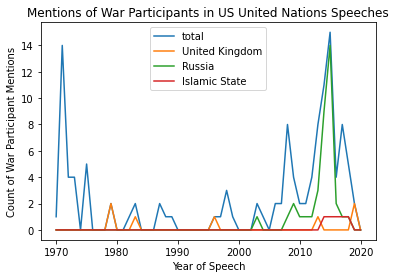

In [25]:
fig, ax = plt.subplots()
ax.plot(df.index, df['Total'], linestyle='-', label='total')
ax.plot(df.index, df["United Kingdom"], linestyle='-', label='United Kingdom')
ax.plot(df.index, df['Russia'], linestyle='-', label = 'Russia')
ax.plot(df.index, df['Islamic State'], linestyle='-', label ='Islamic State')
plt.title("Mentions of War Participants in US United Nations Speeches")
plt.xlabel("Year of Speech")
plt.ylabel("Count of War Participant Mentions")
plt.legend()

#### What countries have been mentioned the most throughout the years


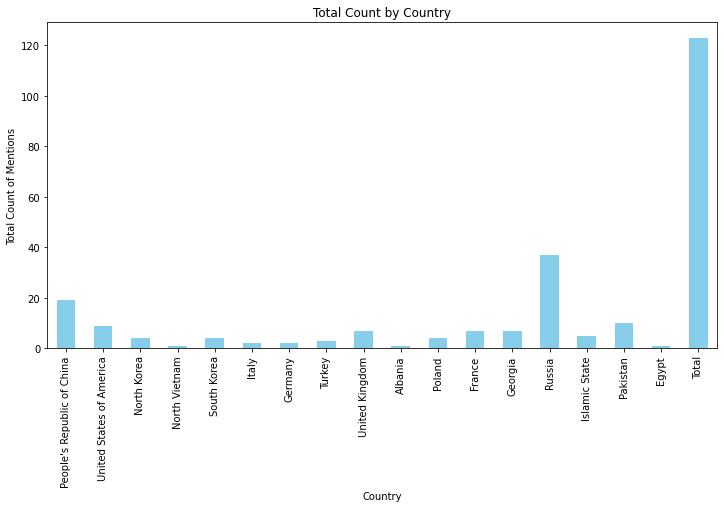

In [26]:
total_counts = df.sum()

total_counts = total_counts[total_counts > 0]

plt.figure(figsize=(12, 6))  
total_counts.plot(kind='bar', color='skyblue')
plt.title('Total Count by Country')
plt.xlabel('Country')
plt.ylabel('Total Count of Mentions')
plt.xticks(rotation=90) 
plt.show()